In [94]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import json
import os
import cPickle as pickle
from collections import Counter
import pandas
from datetime import datetime
from shutil import copyfile

In [116]:
popularRoot = "/datasets/sagarj/vineData/Dataset/"
recentRoot = "/datasets/sagarj/vine2016/Dataset/"
postDir = "savedPosts/"
popUserDir = "Users/"
unpopUserDir = "UserProfiles/"
vidsDir = "Videos/"
tracked = "../postTracking/Day10/"
unpopularDir = "/datasets/sagarj/UnPopular2016_senti/"
unpopVidsDir = unpopularDir + "Videos/"
unpopPostsDir = unpopularDir + "Posts/"

In [160]:
def readJson(path):
    f = open(path)
    data = json.loads(f.read())
    return data

def getPopular():
    popularDir = popularRoot + postDir
    popularPosts = os.listdir(popularDir)
    posts = []
    for post in popularPosts:
        record = readJson(popularDir + post)
        p = record['data']
        if isinstance(p,dict):
            posts.append(p['records'][0])
    return posts

def getUsersPop():
    popularDir = popularRoot + popUserDir
    popularPosts = os.listdir(popularDir)
    posts = []
    followers = []
    for post in popularPosts:
        record = readJson(popularDir + post)
        p = record['data']
        if isinstance(p,dict) and p.has_key('followerCount'):
            posts.append(p)
            followers.append(p['followerCount'])
    return posts , followers

def getUsersUnPop():
    popularDir = recentRoot + unpopUserDir
    popularPosts = os.listdir(popularDir)
    posts = []
    followers = []
    for post in popularPosts:
        record = readJson(popularDir + post)
        p = record['data']
        if isinstance(p,dict) and p.has_key('followerCount'):
            posts.append(p)
            followers.append(p['followerCount'])
    return posts , followers

def getCrawled(bias = ""):
    crawledDir = recentRoot + postDir + bias
    crawledPosts = os.listdir(crawledDir)
    posts = []
    for post in crawledPosts:
        record = readJson(crawledDir + post)
        p = record['data']
        if isinstance(p,dict):
            posts.append(p['records'][0])
    return posts

def getPopMetrics(vineList):
    likes = []
    reposts = []
    loops = []
    timestamps = []
    for vine in vineList:
        likes.append(vine['likes']['count'])
        reposts.append(vine['reposts']['count'])
        loops.append(vine['loops']['count'])
        timestamps.append(datetime.strptime(vine['created'], '%Y-%m-%dT%H:%M:%S.%f'))
    return likes, reposts, loops, timestamps

def copyList(listOfFiles,srcFolder , dstFolder):
    if not os.path.exists(dstFolder):
        os.makedirs(dstFolder)
    for f in listOfFiles:
        src = srcFolder + f
        dst = dstFolder + f
        copyfile(src , dst)

In [161]:

recentList = getCrawled()

In [162]:
popularList = getPopular()

In [163]:
trackedList = getCrawled(tracked)

In [164]:
recentLikes , recentReposts, recentLoops , recentTimestamps = getPopMetrics(recentList)

popLikes , popReposts, popLoops , popTimeStamps= getPopMetrics(popularList)

trackedLikes , trackedReposts, trackedLoops , trackedTimeStamps= getPopMetrics(trackedList)

In [171]:
Likes = popLikes+ trackedLikes
Reposts = popReposts+ recentReposts

In [172]:
Likes = map(lambda x: 1 if x == 0 else x, Likes)
Reposts = map(lambda x: 1 if x == 0 else x, Reposts)

In [173]:
print np.mean(Likes) , np.median(Likes) , np.mean(Reposts) , np.median(Reposts)

20231.8378502 85.0 3968.76896864 1.0


In [177]:
sampleL = np.random.choice(len(Likes) , 3000)
sampleR = np.random.choice(len(Reposts) , 3000)

In [178]:
likes = [Likes[i] for i in sampleL]
reposts = [Reposts[i] for i in sampleR]

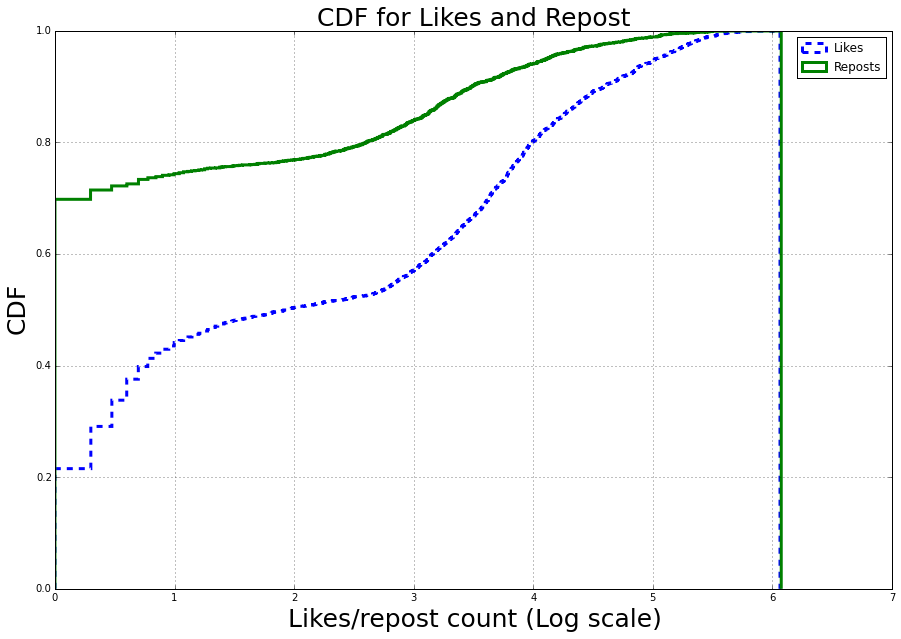

In [180]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
plt.hist(np.log10(likes), 2000, normed=1,histtype='step', cumulative=True,linewidth = 3.0,linestyle='dashed')
plt.hist(np.log10(reposts), 1000, normed=1,histtype='step', cumulative=True,linewidth = 3.0)
plt.title("CDF for Likes and Repost", fontsize = 25)
plt.xlabel("Likes/repost count (Log scale)",fontsize = 25)
plt.ylabel("CDF",fontsize = 25)
plt.legend(['Likes' , 'Reposts'])
plt.grid(True)
plt.show()

In [79]:
Top1000 = np.argsort(trackedLoops)[-50:]
trackedTop1000 = [trackedLoops[i] for i in Top1000]
trackedTop1000Posts = [trackedList[i] for i in Top1000]
print len(trackedTop1000)

50


In [77]:
print np.median(trackedTop1000) , np.mean(trackedTop1000) , np.var(trackedTop1000)

654258.0 994758.94 916679471396.0


In [85]:
unpopular3000 = np.argsort(trackedLoops)[:3000]
unpop3000loops = [trackedLoops[i] for i in unpopular3000]
unpop3000Posts = [trackedList[i] for i in unpopular3000]

In [95]:
print np.median(unpop3000loops) , np.mean(unpop3000loops) , np.var(unpop3000loops)

14.0 14.1313333333 48.9874182222


In [105]:
unpop3000Posts[0]['videoUrl'].split('/')[5].split('?')[0]

u'7A176536C71379823278809608192_147195323922152276a86b4.mp4.mp4'

In [111]:
unpopPostList = []
for p in unpop3000Posts: 
    postid = p['postId']
    filename = str(postid) + ".json"
    unpopPostList.append(filename)

In [100]:
#srcPosts = recentRoot + postDir
#copyList(unpopPostList, srcPosts , unpopPostsDir)

In [108]:
unpopVidList = []
for p in unpop3000Posts: 
    postid = p['videoUrl'].split('/')[5].split('?')[0]
    filename = str(postid)
    unpopVidList.append(filename)

In [109]:
print unpopVidList[:10]

['7A176536C71379823278809608192_147195323922152276a86b4.mp4.mp4', 'B94CAAD3B61380638140196417536_1472147602595a1c6855a0d.mp4.mp4', '645B7CDBA41379823515410362368_14719532970756817878dd5.mp4.mp4', 'DCF3C37ED81379823481755168768_147195328391775f882b6e7.mp4.mp4', 'C1F733B4D91379823710592233472_1471953315908d00246bee1.mp4.mp4', '4E31FD7BE31379733308975800320_14719317729515b34c658ef.mp4.mp4', 'AA9C1B39271379730086026276864_1471931071659ded6c7bdda.mp4.mp4', '850F89C6EC1379731721771270144_1471931397412d7d0387259.mp4.mp4', '561CBD70471379822725174304768_1471953075233a5948289a7.mp4.mp4', '19D0B068C11380907265473060864_1472211768856f20e72cdfa.mp4.mp4']


In [114]:
# srcVids = recentRoot + vidsDir
# copyList(unpopVidList, srcVids , unpopVidsDir)

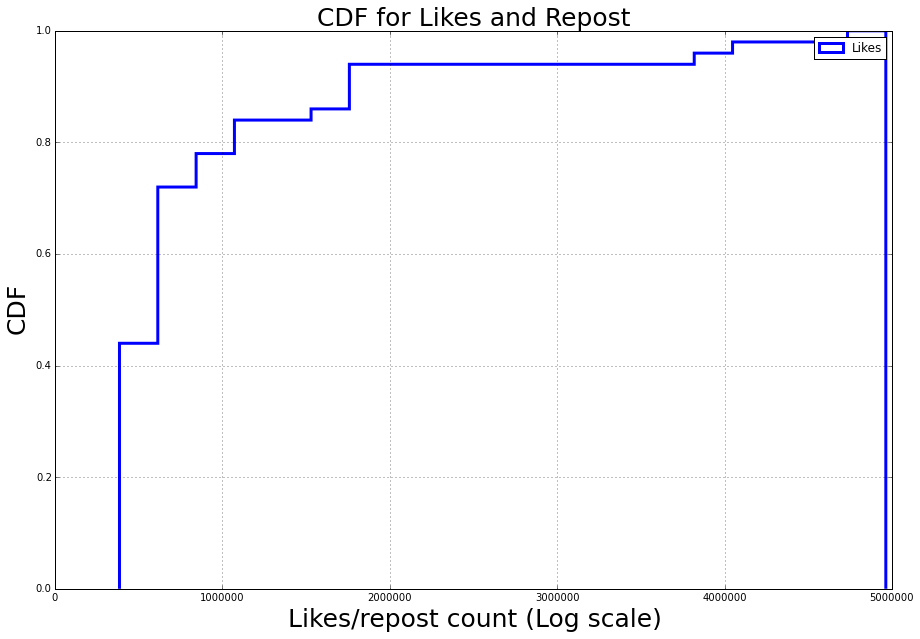

In [78]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
#plt.hist(popLikes, 1000, normed=1,histtype='step', cumulative=True,linewidth = 3.0,linestyle='dashed')
#plt.hist(popReposts, 1000, normed=1,histtype='step', cumulative=False,linewidth = 3.0)
plt.hist(trackedTop1000, 20, normed=1,histtype='step', cumulative=True,linewidth = 3.0)
plt.title("CDF for Likes and Repost", fontsize = 25)
plt.xlabel("Likes/repost count (Log scale)",fontsize = 25)
plt.ylabel("CDF",fontsize = 25)
plt.legend(['Likes' , 'Reposts'])
plt.grid(True)
plt.show()

In [11]:
print np.median(popLoops) , np.mean(popLoops) , np.var(popLoops)

 318566.0 2405671.25227 4.50174420562e+13


In [16]:
print pow(10,4.5)

31622.7766017


In [141]:
popUsers, popFollowers = getUsersPop()

In [142]:
print np.mean(popFollowers) , np.median(popFollowers)

366738.428633 40012.0


In [143]:
unpopUsers, unpopFollowers = getUsersUnPop()

In [145]:
print np.mean(unpopFollowers) , np.median(unpopFollowers)

7381.18321091 99.0


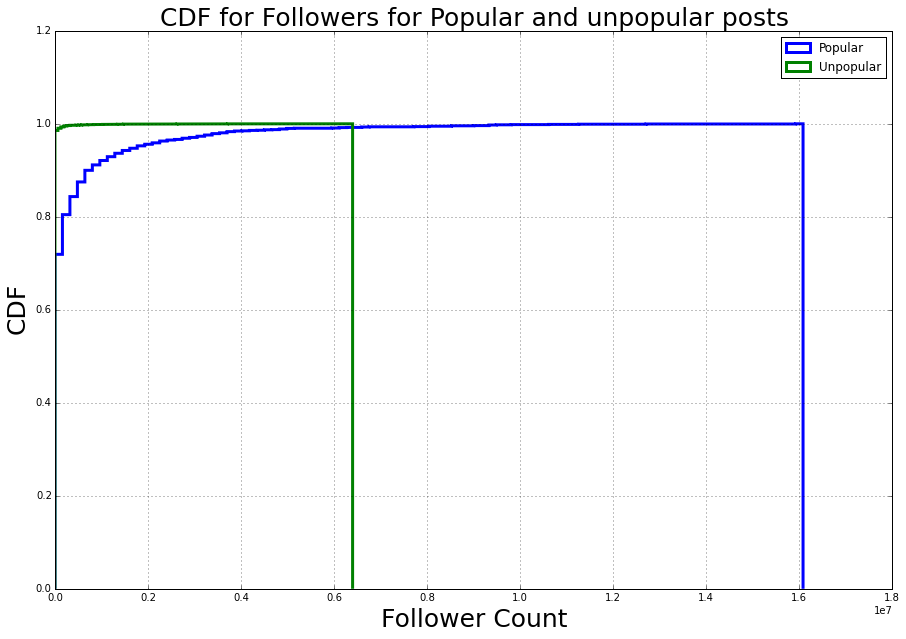

In [149]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
plt.hist(popFollowers, 100, normed=1,histtype='step', cumulative=True,linewidth = 3.0)
plt.hist(unpopFollowers, 100, normed=1,histtype='step', cumulative=True,linewidth = 3.0)
plt.title("CDF for Followers for Popular and unpopular posts", fontsize = 25)
plt.xlabel("Follower Count",fontsize = 25)
plt.ylabel("CDF",fontsize = 25)
plt.legend(['Popular' , 'Unpopular'])
plt.grid(True)
plt.show()